In [11]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from matplotlib import pyplot as plt

In [12]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [13]:
X_train.shape

(60000, 28, 28)

In [14]:
y_train.shape

(60000,)

In [15]:
X_train[0].shape

(28, 28)

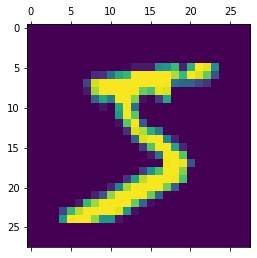

In [16]:
plt.matshow(X_train[0])

In [17]:
y_train[0]

5

In [30]:
X_train = X_train/255
X_test = X_test/255

### Flatten the data set

we want a dataset having shape of (number of elements, width * lenght)

In [31]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)
X_train_flattened.shape

(60000, 784)

In [32]:
X_test_flattened.shape

(10000, 784)

In [33]:
X_test_flattened

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [34]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [35]:
model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4861 - accuracy: 0.8798
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3060 - accuracy: 0.9153
Epoch 3/5
1875/1875 [==============================] - 10s 6ms/step - loss: 0.2856 - accuracy: 0.9210
Epoch 4/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2744 - accuracy: 0.9235
Epoch 5/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2677 - accuracy: 0.9263


In [37]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2701 - accuracy: 0.9245


[0.27006158232688904, 0.9244999885559082]

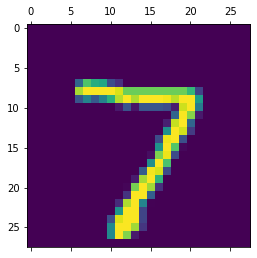

In [38]:
plt.matshow(X_test[0])

In [41]:
y_pred = model.predict(X_test_flattened)
y_pred[0]

array([1.9518819e-05, 1.2825527e-10, 3.6885776e-05, 9.8414421e-03,
       1.1739324e-06, 8.0978440e-05, 1.1500704e-09, 8.3692354e-01,
       4.1566942e-05, 1.2472868e-03], dtype=float32)

In [42]:
np.argmax(y_pred[0])

7

In [48]:
y_predicted_label = [np.argmax(i) for i in y_pred]
y_predicted_label[:3]

[7, 2, 1]

In [51]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_label)

In [52]:
import seaborn as sn

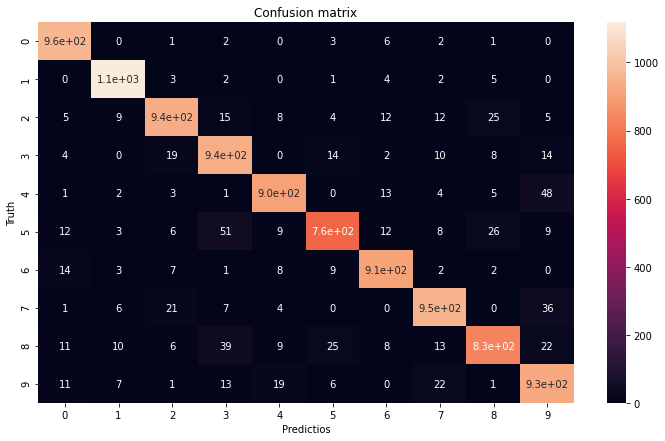

In [55]:
plt.figure(figsize=(12,7))
sn.heatmap(cm, annot=True)
plt.title("Confusion matrix")
plt.xlabel("Predictios")
plt.ylabel("Truth")
plt.show()

In [56]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='sigmoid'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [58]:
model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2730 - accuracy: 0.9244
Epoch 2/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.1808 - accuracy: 0.9479
Epoch 3/5
1875/1875 [==============================] - 14s 8ms/step - loss: 0.1379 - accuracy: 0.9613
Epoch 4/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.1111 - accuracy: 0.9690
Epoch 5/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0925 - accuracy: 0.9742


In [61]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.1030 - accuracy: 0.9684


[0.10295047610998154, 0.9684000015258789]

In [63]:
y_pred = model.predict(X_test_flattened)
y_pred[5]

array([3.8601365e-07, 2.3699177e-07, 9.8213732e-06, 1.0885955e-04,
       1.3225273e-08, 2.6494440e-06, 1.5434500e-09, 8.1235439e-02,
       3.7255921e-07, 8.2560591e-06], dtype=float32)

In [65]:
np.argmax(y_pred[5])

1